# **PANDAS AND PLOTTING PRACTICE QUESTIONS**

Below are exercise questions to practice contents from the lecture material.

##1. **List-to-Series Conversion**

Given a list, output the corresponding pandas series

`given_list = [2, 4, 5, 6, 9]`

One-Dimensional: A Series is essentially a one-dimensional array, but unlike a NumPy array, it can have custom labels or indexes associated with each element.

Each element in a Series has a label or index that can be used to access and manipulate the data

In [2]:
import pandas as pd

In [4]:
given_list = [2, 4, 5, 6, 9]

In [6]:
series = pd.Series(given_list)

In [8]:
print(series)

0    2
1    4
2    5
3    6
4    9
dtype: int64


##2. **List-to-Series Conversion with Custom Indexing**

Using the same list provided, create a series with an index "a","b","c","d", and "e". Save this Series as **given_series**.



In [10]:
custom_index = ['a', 'b', 'c', 'd', 'e']

given_series = pd.Series(given_list, index=custom_index)

print(given_series)

a    2
b    4
c    5
d    6
e    9
dtype: int64


##3. **Retrieve information from Series**

Using **given_series** retieve values for index b through d



In [11]:
values_b_to_d = given_series['b':'d']

##4. **Create the following table in a dataframe called transcriptome.**

_Note that the gene names are indexes and treatments are column names_

 _        | Control | Nitrogen | Phosphate | Potassium
---------|---------|----------|-----------|-----------
GeneA    |   89    |    78    |     77    |    56
GeneB    |   90    |    99    |     85    |    97
GeneC    |   78    |    94    |     99    |    87
GeneD    |   81    |    83    |     80    |    79




In [12]:
data = {
    'Control': [89, 90, 78, 81],
    'Nitrogen': [78, 99, 94, 83],
    'Phosphate': [77, 85, 99, 80],
    'Potassium': [56, 97, 87, 79]
}

index = ['GeneA', 'GeneB', 'GeneC', 'GeneD']

transcriptome = pd.DataFrame(data, index=index)

In [13]:
transcriptome

,Control,Nitrogen,Phosphate,Potassium
GeneA,89,78,77,56
GeneB,90,99,85,97
GeneC,78,94,99,87
GeneD,81,83,80,79


##5. **Calculate the Average for each Gene and add it as a separate column called expression_average**

your answer should look like this:

 _        | Control | Nitrogen | Phosphate | Potassium | expression_average
---------|---------|----------|-----------|-----------|-----
GeneA    |   89    |    78    |     77    |    56 | 75
GeneB    |   90    |    99    |     85    |    97 | 92.75
GeneC    |   78    |    94    |     99    |    87 | 89.50
GeneD    |   81    |    83    |     80    |    79 | 80.75



In [17]:
# Calculate the average for each gene and add it as a new column
transcriptome['expression_average'] = transcriptome.mean(axis=1)

print(transcriptome)

       Control  Nitrogen  Phosphate  Potassium  expression_average
GeneA       89        78         77         56               75.00
GeneB       90        99         85         97               92.75
GeneC       78        94         99         87               89.50
GeneD       81        83         80         79               80.75


##6. **Sort Dataframe such that gene with highest expression_average is on top**

_Use a pandas dataframe method to accomplish this_

In [18]:
# Sort the DataFrame by 'expression_average' in descending order
transcriptome = transcriptome.sort_values(by='expression_average', ascending=False)

print(transcriptome)

       Control  Nitrogen  Phosphate  Potassium  expression_average
GeneB       90        99         85         97               92.75
GeneC       78        94         99         87               89.50
GeneD       81        83         80         79               80.75
GeneA       89        78         77         56               75.00


transcriptome = transcriptome.drop(columns='expression_average')

In [19]:
transcriptome = transcriptome.drop(columns='expression_average')

##8. **Generate a barplot plotting the expression of GeneA**

In [21]:
import matplotlib.pyplot as plt

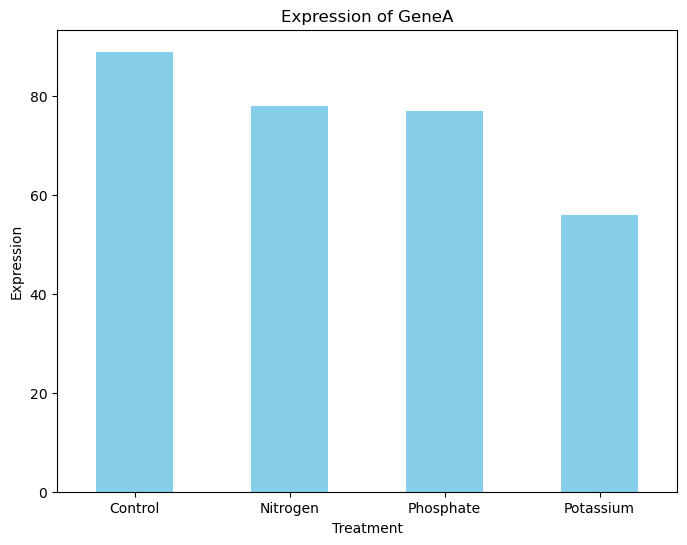

In [22]:
# Select the expression data for 'GeneA'
geneA_expression = transcriptome.loc['GeneA']

# Create a bar plot
plt.figure(figsize=(8, 6))
geneA_expression.plot(kind='bar', color='skyblue')
plt.title('Expression of GeneA')
plt.xlabel('Treatment')
plt.ylabel('Expression')
plt.xticks(rotation=0)
plt.show()

## 9. Melt the dataframe and calle it transcriptome_melt

First add a column named **GeneName** and fill it with the index from transcriptome

Now when you melt you can use GeneName as the id_vars and the remaining as value_vars.

In [24]:
transcriptome['GeneName'] = transcriptome.index

In [25]:
# Melt the DataFrame
transcriptome_melt = pd.melt(transcriptome, id_vars='GeneName', var_name='Treatment', value_name='Expression')

print(transcriptome_melt)

   GeneName  Treatment  Expression
0     GeneB    Control          90
1     GeneC    Control          78
2     GeneD    Control          81
3     GeneA    Control          89
4     GeneB   Nitrogen          99
5     GeneC   Nitrogen          94
6     GeneD   Nitrogen          83
7     GeneA   Nitrogen          78
8     GeneB  Phosphate          85
9     GeneC  Phosphate          99
10    GeneD  Phosphate          80
11    GeneA  Phosphate          77
12    GeneB  Potassium          97
13    GeneC  Potassium          87
14    GeneD  Potassium          79
15    GeneA  Potassium          56


## 10. **Using the transcriptome_melt, create a line plot for each gene.**



In [39]:
# Get a list of unique gene names
unique_genes = transcriptome_melt['GeneName'].unique()

# Create a line plot for each gene
for gene in unique_genes:
    gene_data = transcriptome_melt[transcriptome_melt['GeneName'] == gene]
    plt.figure(figsize=(8, 6))
    plt.plot(gene_data['Treatment'], gene_data['Expression'], marker='o', label=gene)
    plt.title(f'Expression of {gene}')
    plt.xlabel('Treatment')
    plt.ylabel('Expression')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()